# Make your own neural network 

here's the instruction of how to mk my own neural network

**Skeleton Code**

1. Initialization
2. Train
3. Query

```python
# A simple example of 3 layors 

class neuralNetwork:

    # initialize the neural network
    def __init__(self,inputnodes,hiddennodes,outputnodes,learningrate):
        self.inodes = inputnodes
        self.hnodes = hiddennodes
        self.onodes = outputnodes
        self.lr = learningrate

    # training funcion
    def train(): pass

    # query the neural network
    def query(): pass
```

---
add the initializing data of node_nums

```python
# number of nodes
input_nodes = 3
hidden_nodes = 3
output_nodes = 3

#learning rate
learning_rate = 0.3

#create instance
n=neuralNetwork(input_nodes,hidden_notes,output_nodes,learning_rate)
```

---
Next , use numpy module to initailze the input-hidden weight matrix and hidden-output matrix

```python
import numpy


self.wih = (numpy.random.rand(self.hnodes , self.inodes)-0.5)
# the arthimetic operation will work on every elements

self.who = (numpy.random.rand(self.inodes , self.onodes)-0.5)

# or use a more "complex" way
self.wih = numpy.random.normal(0.0,pow(self.hnodes,-0.5),(self.hnodes,self.inodes))
self.who = numpy.random.normal(0.0,pow(self.onodes,-0.5),(self.onodes,self.hnodes))
```

---
Accomplish the **Query function** first , it is ez and we need it for training : $X_hidden = W_ih \cdot I$ , go on calculating we'll get the answer

And for the output of each layer , $O_hidden = sigmoid(X_hidden)$

```python
import scipy.special
# for calling sigmoid
# define activation function in the class instead

self.activation_function = lambda x:scipy.special.expit(x)



hidden_inputs = numpy.dot(self.wih,inputs)

hidden_outputs = self.activation_function(hidden_inputs)


final_inputs = numpy.dot(self.who,hidden_outputs)
final_outputs = self.activation_funciotn(final_inputs)
```


---
## Let's see what we've got so far

In [1]:
import numpy
import scipy.special

# neural network class definition
class neuralNetwork:
# initialise the neural network
    def __init__(self, inputnodes, hiddennodes, outputnodes,
            learningrate): # set number of nodes in each input, hidden, output layer
        self.inodes = inputnodes
        self.hnodes = hiddennodes
        self.onodes = outputnodes

        
# link weight matrices, wih and who
# weights inside the arrays are w_i_j, where link is from node i tonode j in the next layer 
# w11 w21
# w12 w22 etc
        self.wih = numpy.random.normal(0.0, pow(self.hnodes, -0.5), (self.hnodes, self.inodes)) 
        self.who = numpy.random.normal(0.0, pow(self.onodes, -0.5), (self.onodes, self.hnodes))
    
# learning rate
        self.lr = learningrate
# activation function is the sigmoid function
        self.activation_function = lambda x: scipy.special.expit(x)
        pass

    
    
# train the neural network
    def train():
        pass

    
# query the neural network
    def query(self, inputs_list):# convert inputs list to 2d array
        inputs = numpy.array(inputs_list, ndmin=2).T
    # calculate signals into hidden layer
        hidden_inputs = numpy.dot(self.wih, inputs)
    # calculate the signals emerging from hidden layer
        hidden_outputs = self.activation_function(hidden_inputs)
    # calculate signals into final output layer
        final_inputs = numpy.dot(self.who, hidden_outputs)
    # calculate the signals emerging from final output layer
        final_outputs = self.activation_function(final_inputs)
        return final_outputs


---
---
So the next step is to ***train*** our network:
1. work on the output of training data
2. calculate **cost** to guide the updating fo weight matrix

```python
# train function
def train(self,inputs_list,targets_lists):
    # convert inputs to matrix 
    inputs = numpy.array(inputs_list,ndmin=2).T #transpsition
    targets =numpy.array(targets_list,ndmin=2).T

    # calculate signals into hidden layer
    hidden_inputs = numpy.dot(self.wih, inputs)
    # calculate the signals emerging from hidden layer
    hidden_outputs = self.activation_function(hidden_inputs)
    
    # calculate signals into final output layer
    final_inputs = numpy.dot(self.who, hidden_outputs)
    # calculate the signals emerging from final output layer
    final_outputs = self.activation_function(final_inputs)

    
    # output layer error is the (target - actual)
    output_errors = targets - final_outputs
    # hidden layer error is the output_errors, split by weights, recombinedat hidden nodes 
    hidden_errors = numpy.dot(self.who.T, output_errors)
    
    # update the weights for the links between the hidden and outputlayers
    self.who += self.lr * numpy.dot((output_errors * final_outputs * (1.0 -final_outputs)), numpy.transpose(hidden_outputs)) 
    
    # update the weightfor the links between the input and hidden layers
    self.wih += self.lr * numpy.dot((hidden_errors * hidden_outputs * (1.0 -hidden_outputs)), numpy.transpose(inputs)) 
    pass
```

---
So we've got the entire code for the little network here

In [2]:
# python notebook for Make Your Own Neural Network
# (c) Tariq Rashid, 2016
# license is GPLv2
import numpy
# scipy.special for the sigmoid function expit()
import scipy.special
# neural network class definition
class neuralNetwork:
    
    
    # initialise the neural network
    def __init__(self, inputnodes, hiddennodes, outputnodes, learningrate):
        # set number of nodes in each input, hidden, output layer
        self.inodes = inputnodes
        self.hnodes = hiddennodes
        self.onodes = outputnodes
        
        # link weight matrices, wih and who
        # weights inside the arrays are w_i_j, where link is from node i to node j in the next layer
        # w11 w21
        # w12 w22 etc 
        self.wih = numpy.random.normal(0.0, pow(self.inodes, -0.5), (self.hnodes, self.inodes))
        self.who = numpy.random.normal(0.0, pow(self.hnodes, -0.5), (self.onodes, self.hnodes))

        # learning rate
        self.lr = learningrate
        
        # activation function is the sigmoid function
        self.activation_function = lambda x: scipy.special.expit(x)
        
        pass

    
    # train the neural network
    def train(self, inputs_list, targets_list):
        # convert inputs list to 2d array
        inputs = numpy.array(inputs_list, ndmin=2).T
        targets = numpy.array(targets_list, ndmin=2).T
        
        # calculate signals into hidden layer
        hidden_inputs = numpy.dot(self.wih, inputs)
        # calculate the signals emerging from hidden layer
        hidden_outputs = self.activation_function(hidden_inputs)
        
        # calculate signals into final output layer
        final_inputs = numpy.dot(self.who, hidden_outputs)
        # calculate the signals emerging from final output layer
        final_outputs = self.activation_function(final_inputs)
        
        # output layer error is the (target - actual)
        output_errors = targets - final_outputs
        # hidden layer error is the output_errors, split by weights, recombined at hidden nodes
        hidden_errors = numpy.dot(self.who.T, output_errors) 
        
        # update the weights for the links between the hidden and output layers
        self.who += self.lr * numpy.dot((output_errors * final_outputs * (1.0 - final_outputs)), numpy.transpose(hidden_outputs))
        
        # update the weights for the links between the input and hidden layers
        self.wih += self.lr * numpy.dot((hidden_errors * hidden_outputs * (1.0 - hidden_outputs)), numpy.transpose(inputs))
        
        pass

    
    # query the neural network
    def query(self, inputs_list):
        # convert inputs list to 2d array
        inputs = numpy.array(inputs_list, ndmin=2).T
        
        # calculate signals into hidden layer
        hidden_inputs = numpy.dot(self.wih, inputs)
        # calculate the signals emerging from hidden layer
        hidden_outputs = self.activation_function(hidden_inputs)
        
        # calculate signals into final output layer
        final_inputs = numpy.dot(self.who, hidden_outputs)
        # calculate the signals emerging from final output layer
        final_outputs = self.activation_function(final_inputs)
        
        return final_outputs
# number of input, hidden and output nodes
input_nodes = 3
hidden_nodes = 3
output_nodes = 3

# learning rate is 0.3
learning_rate = 0.3

# create instance of neural network
n = neuralNetwork(input_nodes,hidden_nodes,output_nodes, learning_rate)
# test query (doesn't mean anything useful yet)
n.query([1.0, 0.5, -1.5])

array([[0.62707948],
       [0.56141421],
       [0.42311942]])

---
---
## Now step to the how to train the network using data

use `.CSV` file to train . Python can easily read this kind of plain-text file .

eg.

```python
data_file = open ("path",'r') # 'r' stands fot reading mode
data_list = date_file.readlines()
date_file.close()
```

to get the value inside , use `split` function

eg.

```python
all_values = data_list[0].split(',')
image_array = numpy.asfarray( all_values[1:].reshape(28,28)) # use slide to get rid of the first value , which is the label
```

---
### But before training , we need extra effort to scale the datas to make them work

eg.RGB(0-255) -> (0.1,i)

- we need to avoid 0 as input , 1 as output
```python
scaled_input = ( numpy.asfarray(all_values[1:])/255.0 * 0.99 ) + 0.01
```

- and here's how to scale target : 
```python
oondes = 10 #the number of output_node
targets = numpy.zeros(onodes) + 0.01 # avoid 0

label = all_values [0]
targets [int(label)] = 0.99 # avoid 1

## see what we've got so far

In [38]:
import numpy
# scipy.special for the sigmoid function expit()
import scipy.special
# library for plotting arrays
import matplotlib.pyplot
# neural network class definition
class neuralNetwork:
    
    
    # initialise the neural network
    def __init__(self, inputnodes, hiddennodes, outputnodes, learningrate):
        # set number of nodes in each input, hidden, output layer
        self.inodes = inputnodes
        self.hnodes = hiddennodes
        self.onodes = outputnodes
        
        # link weight matrices, wih and who
        # weights inside the arrays are w_i_j, where link is from node i to node j in the next layer
        # w11 w21
        # w12 w22 etc 
        self.wih = numpy.random.normal(0.0, pow(self.inodes, -0.5), (self.hnodes, self.inodes))
        self.who = numpy.random.normal(0.0, pow(self.hnodes, -0.5), (self.onodes, self.hnodes))

        # learning rate
        self.lr = learningrate
        
        # activation function is the sigmoid function
        self.activation_function = lambda x: scipy.special.expit(x)
        
        pass

    
    # train the neural network
    def train(self, inputs_list, targets_list):
        # convert inputs list to 2d array
        inputs = numpy.array(inputs_list, ndmin=2).T
        targets = numpy.array(targets_list, ndmin=2).T
        
        # calculate signals into hidden layer
        hidden_inputs = numpy.dot(self.wih, inputs)
        # calculate the signals emerging from hidden layer
        hidden_outputs = self.activation_function(hidden_inputs)
        
        # calculate signals into final output layer
        final_inputs = numpy.dot(self.who, hidden_outputs)
        # calculate the signals emerging from final output layer
        final_outputs = self.activation_function(final_inputs)
        
        # output layer error is the (target - actual)
        output_errors = targets - final_outputs
        # hidden layer error is the output_errors, split by weights, recombined at hidden nodes
        hidden_errors = numpy.dot(self.who.T, output_errors) 
        
        # update the weights for the links between the hidden and output layers
        self.who += self.lr * numpy.dot((output_errors * final_outputs * (1.0 - final_outputs)), numpy.transpose(hidden_outputs))
        
        # update the weights for the links between the input and hidden layers
        self.wih += self.lr * numpy.dot((hidden_errors * hidden_outputs * (1.0 - hidden_outputs)), numpy.transpose(inputs))
        
        pass

    
    # query the neural network
    def query(self, inputs_list):
        # convert inputs list to 2d array
        inputs = numpy.array(inputs_list, ndmin=2).T
        
        # calculate signals into hidden layer
        hidden_inputs = numpy.dot(self.wih, inputs)
        # calculate the signals emerging from hidden layer
        hidden_outputs = self.activation_function(hidden_inputs)
        
        # calculate signals into final output layer
        final_inputs = numpy.dot(self.who, hidden_outputs)
        # calculate the signals emerging from final output layer
        final_outputs = self.activation_function(final_inputs)
        
        return final_outputs
# number of input, hidden and output nodes
input_nodes = 784
hidden_nodes = 400
output_nodes = 10

# learning rate
learning_rate = 0.1

# create instance of neural network
n = neuralNetwork(input_nodes,hidden_nodes,output_nodes, learning_rate)

# load the mnist training data CSV file into a list
training_data_file = open("mnist_dataset/mnist_train_100.csv", 'r')
training_data_list = training_data_file.readlines()
training_data_file.close()

# train the neural network
# go through all records in the training data set
for record in training_data_list:
    # split the record by the ',' commas
    all_values = record.split(',')



    
    # scale and shift the inputs
    inputs = (numpy.asarray(all_values[1:], dtype=float) / 255.0 * 0.99) + 0.01

    # no more asfarray in new version of numpy !!!
    

    # create the target output values (all 0.01, except the desired label whichis 0.99) 
    targets = numpy.zeros(output_nodes) + 0.01
    # all_values[0] is the target label for this record
    targets[int(all_values[0])] = 0.99
    n.train(inputs, targets)
    pass

---
Cool! training finished , now steo to testing

## Test Network

In [39]:
# load test data
test_data_file = open ("mnist_dataset/mnist_test_10.csv" , 'r' )
test_data_list = test_data_file.readlines()
test_data_file.close()


In [40]:
# test the neural network

# scorecard for how well the network performs, initially empty
scorecard = []

# go through all the records in the test data set
for record in test_data_list:
    # split the record by the ',' commas
    all_values = record.split(',')
    # correct answer is first value
    correct_label = int(all_values[0])
    # scale and shift the inputs
    inputs = (numpy.asarray(all_values[1:],dtype = float)) / 255.0 * 0.99 + 0.01
    # query the network
    outputs = n.query(inputs)
    # the index of the highest value corresponds to the label
    label = numpy.argmax(outputs)
    # append correct or incorrect to list
    if (label == correct_label):
        # network's answer matches correct answer, add 1 to scorecard
        scorecard.append(1)
    else:
        # network's answer doesn't match correct answer, add 0 to scorecard
        scorecard.append(0)
        pass
    
    pass

In [41]:
# calculate the performance score, the fraction of correct answers
print (scorecard)
scorecard_array = numpy.asarray(scorecard)
print ("performance = ", scorecard_array.sum() / scorecard_array.size)

[1, 0, 1, 1, 1, 1, 0, 0, 0, 0]
performance =  0.5


---
It it not behaving good enough

## Give it a real TRAIN

using **large** data to train it again! 

In [42]:
# load the mnist training data CSV file into a list
training_data_file = open("mnist_dataset/mnist_train.csv", 'r')
training_data_list = training_data_file.readlines()
training_data_file.close()

# train the neural network
# go through all records in the training data set
for record in training_data_list:
    # split the record by the ',' commas
    all_values = record.split(',')



    
    # scale and shift the inputs
    inputs = (numpy.asarray(all_values[1:], dtype=float) / 255.0 * 0.99) + 0.01

    # no more asfarray in new version of numpy !!!
    

    # create the target output values (all 0.01, except the desired label whichis 0.99) 
    targets = numpy.zeros(output_nodes) + 0.01
    # all_values[0] is the target label for this record
    targets[int(all_values[0])] = 0.99
    n.train(inputs, targets)
    pass

In [43]:
# load test data
test_data_file = open ("mnist_dataset/mnist_test.csv" , 'r' )
test_data_list = test_data_file.readlines()
test_data_file.close()

In [44]:
for record in test_data_list:
    # split the record by the ',' commas
    all_values = record.split(',')
    # correct answer is first value
    correct_label = int(all_values[0])
    # scale and shift the inputs
    inputs = (numpy.asarray(all_values[1:],dtype = float)) / 255.0 * 0.99 + 0.01
    # query the network
    outputs = n.query(inputs)
    # the index of the highest value corresponds to the label
    label = numpy.argmax(outputs)
    # append correct or incorrect to list
    if (label == correct_label):
        # network's answer matches correct answer, add 1 to scorecard
        scorecard.append(1)
    else:
        # network's answer doesn't match correct answer, add 0 to scorecard
        scorecard.append(0)
        pass
    
    
    pass

scorecard_array = numpy.asarray(scorecard)
print ("performance = ", scorecard_array.sum() / scorecard_array.size)

performance =  0.9574425574425575


---
we can see the performance is around 95% , relatively high

---

## Recognize from own image .

By converting image to an array ( input_list ) size of 784:

1. read image , convert to black_white , use one number to replace rgb_array
2. process noise (optional) : for isolated black dots , erase it
3. zoom and squeeze : zoom to the "number"(optional) , squeeze it to shape **28 * 28**


In [45]:
import matplotlib.pyplot as plt
import numpy as np
from math import sqrt

def readim_gray(path: str) -> np.ndarray:
    """
    Read an image using matplotlib and return a grayscale ndarray.

    Parameters
    ----------
    path : str
        Path to the image file.

    Returns
    -------
    img_gray : np.ndarray
        2D grayscale image array (dtype float32, range [0,1]).
    """
    img = plt.imread(path)

    # If it's RGB or RGBA, convert to grayscale
    if img.ndim == 3:
        img = img[..., :3]  # drop alpha if exists
        img_gray = (
            0.2989 * img[..., 0] +
            0.5870 * img[..., 1] +
            0.1140 * img[..., 2]
        )
    else:
        img_gray = img


    return img_gray



In [46]:
import numpy as np

def preprocess_mnist_style(img: np.ndarray,
                           target_size: int = 28,
                           box_size: int = 20,
                           padding_ratio: float = 0.1) -> np.ndarray:
    """
    Preprocess a grayscale image to MNIST-like 28x28 centered image.

    Steps:
    1. Normalize to [0,1].
    2. Detect which polarity corresponds to the digit (auto-invert if needed).
    3. Crop bounding box around the digit, add small padding.
    4. Resize proportionally so the longest side fits `box_size`.
    5. Place the resized content into a target_size x target_size canvas centered.
    6. Compute center-of-mass and shift so mass is centered at (target_size/2).
    7. Normalize to [0.01, 0.99] and return float32.

    Note: requires skimage.transform.resize for best results. If scipy.ndimage.shift is available
    it will be used for subpixel shift; otherwise an integer roll fallback is used.
    """
    # 1. normalize dtype and range
    img = img.astype(np.float32)
    if img.max() > 1.0:
        img = img / 255.0

    # 2. auto-detect polarity: choose the representation where digit area is smaller
    #    so that "digit" has larger intensity after possible inversion.
    thresh = img.mean()
    area_dark = np.sum(img < thresh)
    area_bright = np.sum(img > thresh)
    if area_dark < area_bright:
        proc = 1.0 - img  # digit was dark -> invert so digit becomes bright
    else:
        proc = img.copy()  # digit already bright

    # 3. bounding box
    thresh = max(proc.max() * 0.1, 0.05)  
    mask = proc > thresh
     # keep a fraction of max to avoid tiny noise
    rows = np.any(mask, axis=1)
    cols = np.any(mask, axis=0)
    if not rows.any() or not cols.any():
        raise ValueError("No digit found — try lowering threshold or check the image.")

    r_inds = np.where(rows)[0]
    c_inds = np.where(cols)[0]
    top, bottom = int(r_inds[0]), int(r_inds[-1])
    left, right = int(c_inds[0]), int(c_inds[-1])

    crop = proc[top:bottom+1, left:right+1]

    # add small padding to the crop
    pad = max(1, int(max(crop.shape) * padding_ratio))
    crop = np.pad(crop, ((pad, pad), (pad, pad)), mode='constant', constant_values=0.0)

    # 4. resize keeping aspect ratio so longer side -> box_size
    try:
        from skimage.transform import resize
    except Exception as e:
        raise ImportError("skimage is required for resizing. Install scikit-image.") from e

    h, w = crop.shape
    scale = box_size / max(h, w)
    new_h = max(1, int(round(h * scale)))
    new_w = max(1, int(round(w * scale)))
    resized = resize(crop, (new_h, new_w), anti_aliasing=True)

    # 5. place into canvas centered
    canvas = np.zeros((target_size, target_size), dtype=np.float32)
    start_y = (target_size - new_h) // 2
    start_x = (target_size - new_w) // 2
    canvas[start_y:start_y+new_h, start_x:start_x+new_w] = resized

    # 6. compute center of mass and shift so the CoM is at the image center
    # prefer scipy.ndimage.shift for subpixel shift, fallback to integer shift
    cy = cx = None
    total = canvas.sum()
    if total == 0:
        # empty after preprocess (shouldn't happen because we checked mask), return canvas
        final = canvas
    else:
        # compute center of mass
        ys, xs = np.indices(canvas.shape)
        cy = (ys * canvas).sum() / total
        cx = (xs * canvas).sum() / total

        shift_y = (target_size - 1) / 2.0 - cy
        shift_x = (target_size - 1) / 2.0 - cx

        # try scipy shift for subpixel accuracy
        try:
            from scipy.ndimage import shift as ndi_shift
            final = ndi_shift(canvas, shift=(shift_y, shift_x), order=1, mode='constant', cval=0.0)
        except Exception:
            # integer fallback using roll + zeroing wrapped areas
            ry = int(round(shift_y))
            rx = int(round(shift_x))
            final = np.roll(canvas, shift=ry, axis=0)
            final = np.roll(final, shift=rx, axis=1)
            # zero wrapped regions
            if ry > 0:
                final[:ry, :] = 0.0
            elif ry < 0:
                final[ry:, :] = 0.0
            if rx > 0:
                final[:, :rx] = 0.0
            elif rx < 0:
                final[:, rx:] = 0.0

    # 7. normalize to [0,1] then map to [0.01, 0.99]
    final = final.astype(np.float32)
    final -= final.min()
    # if final.max() > 0:
    #     final /= final.max()

    final = final * 0.99 + 0.01
    return final.astype(np.float32)


In [47]:
# define a predict_out funcion
def predict_out(matrix: np.ndarray) -> int:
    values = matrix.flatten()  # 展平成一维
    out = -1
    max_val = -float("inf")
    for i in range(values.size):
        if values[i] > max_val:
            max_val = values[i]
            out = i
    return out


[[0.01       0.01       0.01       0.01       0.01       0.01
  0.01       0.01       0.01       0.01       0.01       0.01
  0.01       0.01       0.01       0.01       0.01       0.01
  0.01       0.01       0.01       0.01       0.01       0.01
  0.01       0.01       0.01       0.01      ]
 [0.01       0.01       0.01       0.01       0.01       0.01
  0.01       0.01       0.01       0.01       0.01       0.01
  0.01       0.01       0.01       0.01       0.01       0.01
  0.01       0.01       0.01       0.01       0.01       0.01
  0.01       0.01       0.01       0.01      ]
 [0.01       0.01       0.01       0.01       0.01       0.01
  0.01       0.01       0.01       0.01       0.01       0.01
  0.01       0.01       0.01       0.01       0.01       0.01
  0.01       0.01       0.01       0.01       0.01       0.01
  0.01       0.01       0.01       0.01      ]
 [0.01       0.01       0.01       0.01       0.01       0.01
  0.01       0.01       0.01       0.01       0.01   

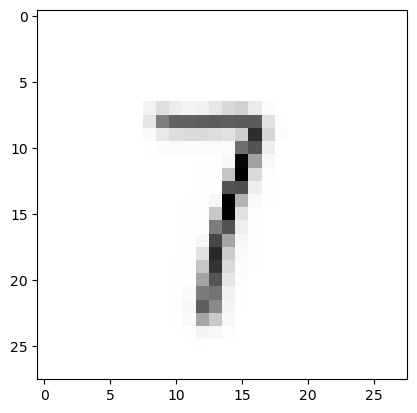

In [60]:
#origin_image = readim_gray("testimages/6.jpg")
test_image = preprocess_mnist_style(readim_gray("testimages/Image00007.png")).reshape(784) 

print(test_image.reshape(28,28))

plt.imshow(test_image.reshape(28, 28), cmap="Greys",interpolation='None')

test_output = n.query(test_image)
print(predict_out(test_output))

---
## Not performing well in real image
So it didn't perform well. **Pity**.

Is it because I cannot completely process the image into the type that training data have ?
Actually the zoom function worked just well

by looking into the array generated , it seems that compared to the *standard data* , my data have lower values

**Maybe I can get it better by increasing the values ?**


---

[[0.01       0.01       0.01       0.01       0.01       0.01
  0.01       0.01       0.01       0.01       0.01       0.01
  0.01       0.01       0.01       0.01       0.01       0.01
  0.01       0.01       0.01       0.01       0.01       0.01
  0.01       0.01       0.01       0.01      ]
 [0.01       0.01       0.01       0.01       0.01       0.01
  0.01       0.01       0.01       0.01       0.01       0.01
  0.01       0.01       0.01       0.01       0.01       0.01
  0.01       0.01       0.01       0.01       0.01       0.01
  0.01       0.01       0.01       0.01      ]
 [0.01       0.01       0.01       0.01       0.01       0.01
  0.01       0.01       0.01       0.01       0.01       0.01
  0.01       0.01       0.01       0.01       0.01       0.01
  0.01       0.01       0.01       0.01       0.01       0.01
  0.01       0.01       0.01       0.01      ]
 [0.01       0.01       0.01       0.01       0.01       0.01
  0.01       0.01       0.01       0.01       0.01   

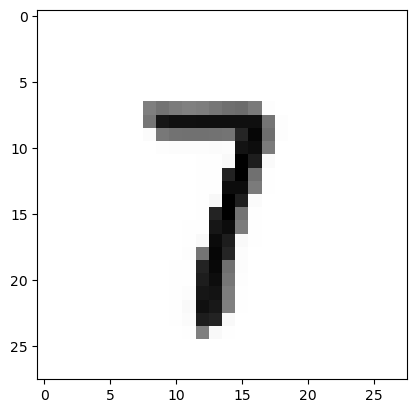

In [62]:
import numpy as np

def reinforce(img: np.ndarray) -> np.ndarray:
    # Copy to avoid in-place modification
    reinforced = img.copy()
    mask = reinforced > 0.06
    reinforced[mask] += (1 - reinforced[mask]) * 0.5
    return reinforced

test_image = reinforce(test_image)

print(test_image.reshape(28, 28))
plt.imshow(test_image.reshape(28, 28), cmap="Greys", interpolation="none")

test_output = n.query(test_image)
print(predict_out(test_output))


## Great ! 
**So it proved that the recognision problem is only because the line of the number is too thin !**